In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

 ### Read Image and Remove the white background
 The original dataset is from https://www.kaggle.com/moltean/fruits

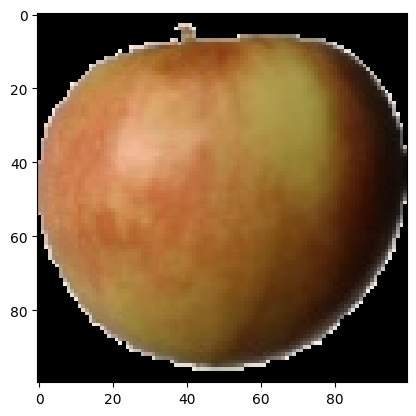

In [2]:
img = cv2.imread('../FruitData/OriginalData/Training_Data/Apple/0_100.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)[1]
object_img = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(object_img, cv2.COLOR_BGR2RGB))
plt.show()

### Change the object HUE value 

0


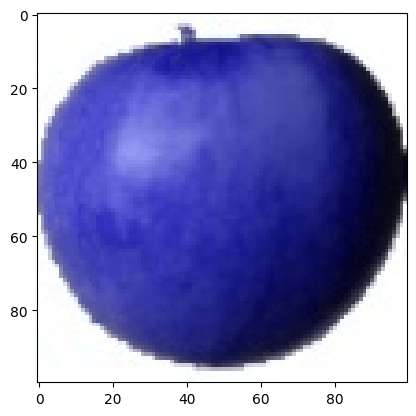

10


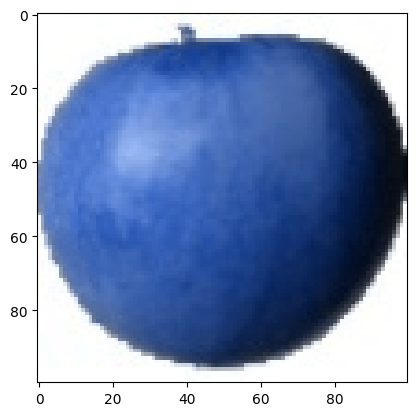

20


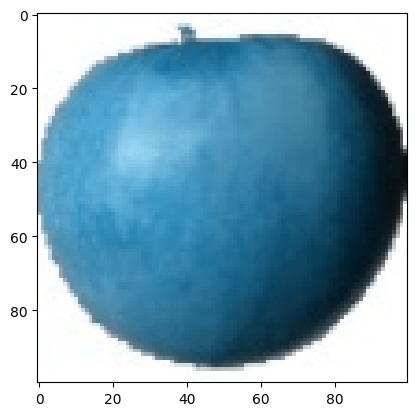

30


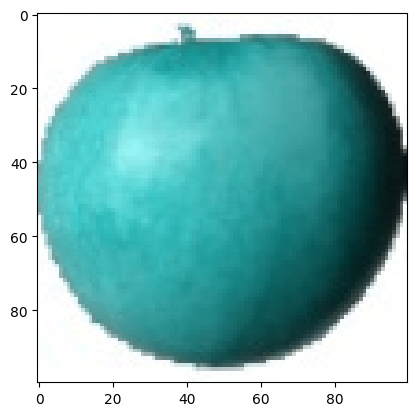

40


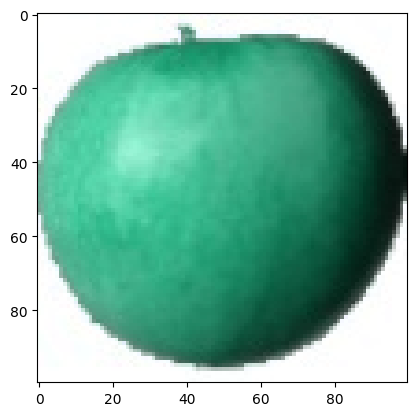

50


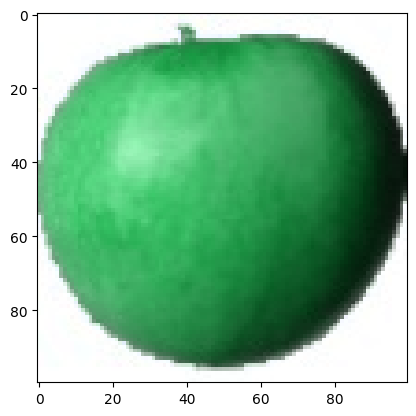

60


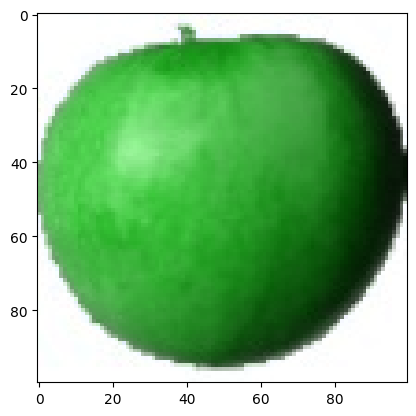

70


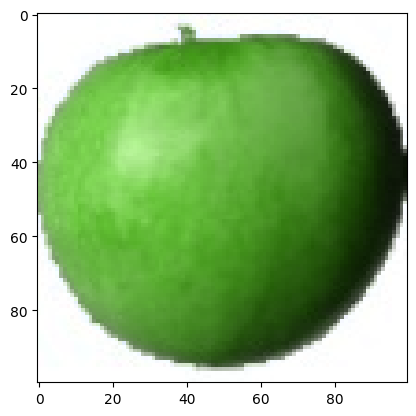

80


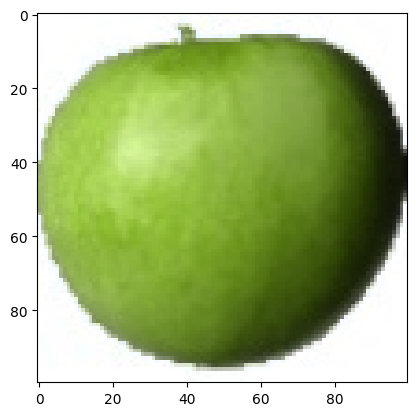

90


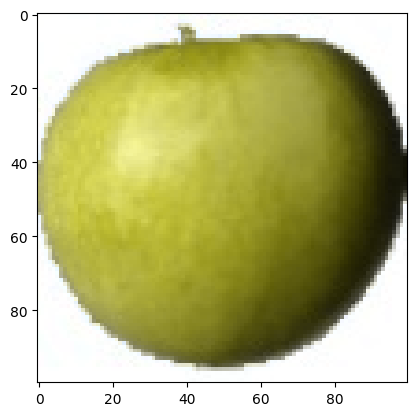

100


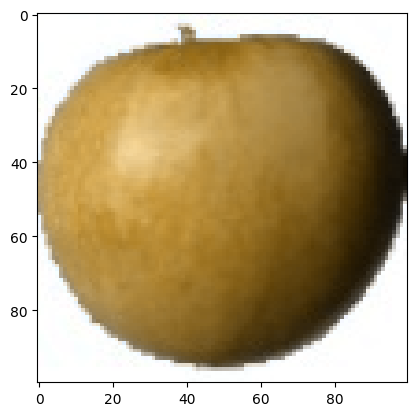

110


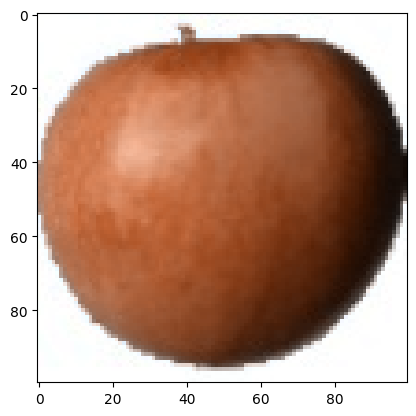

120


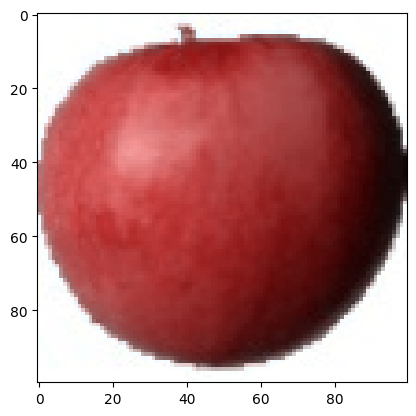

130


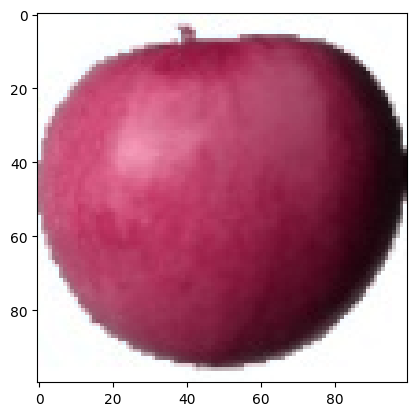

140


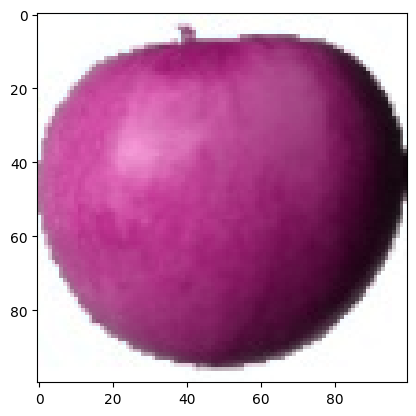

150


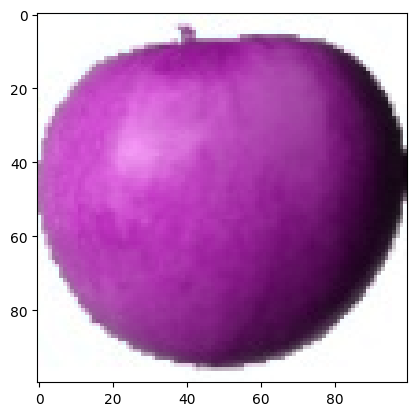

160


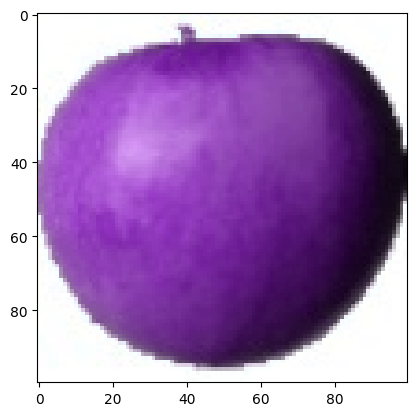

170


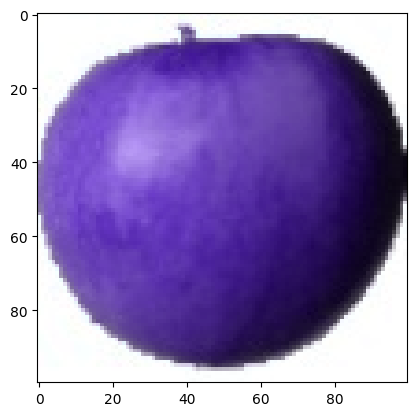

In [3]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue_values = [i for i in range(0, 180, 10)]
for hue_value in hue_values:
    print(hue_value)
    hsv[mask != 0, 0] = hue_value
    result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    plt.imshow(result)
    plt.show()

### Check the HUE value for other objects

#### Orange

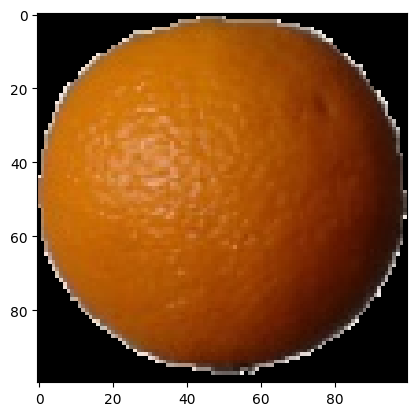

In [4]:
img = cv2.imread('../FruitData/OriginalData/Training_Data/Orange/0_100.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)[1]
object_img = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(object_img, cv2.COLOR_BGR2RGB))
plt.show()

0


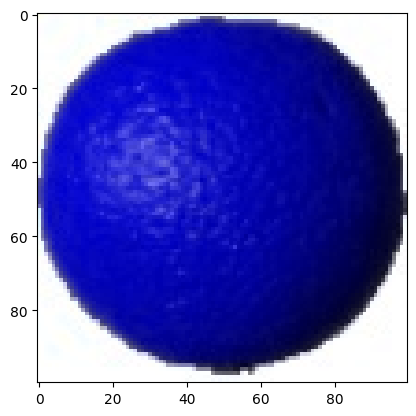

10


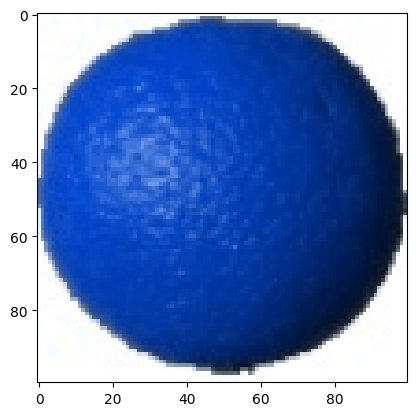

20


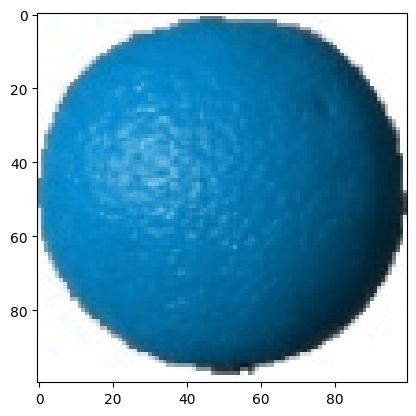

30


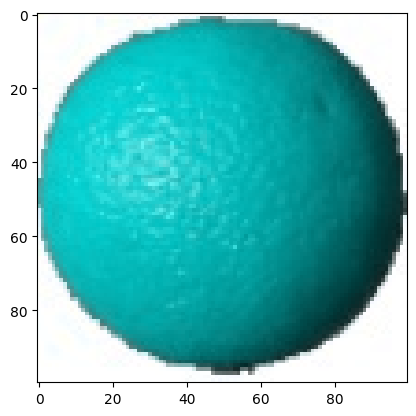

40


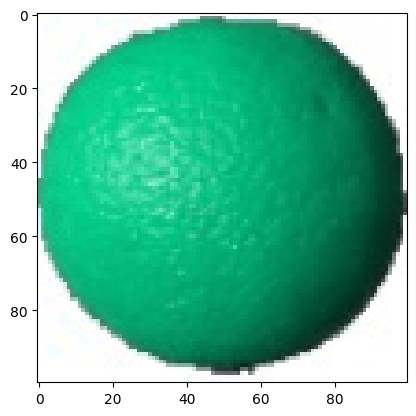

50


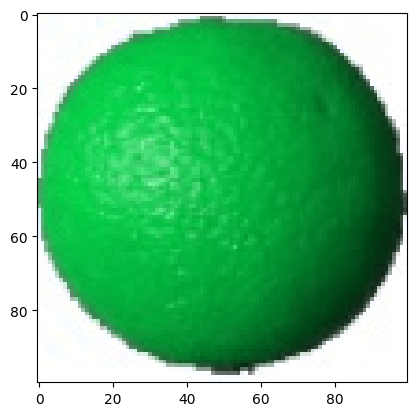

60


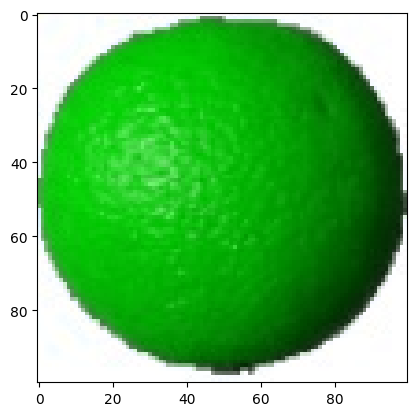

70


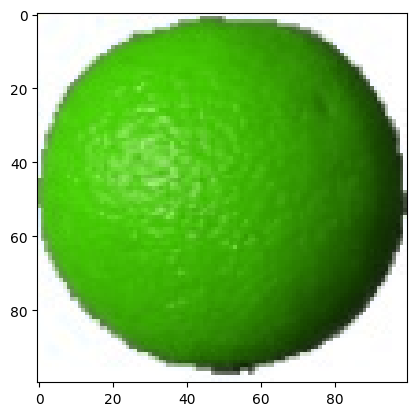

80


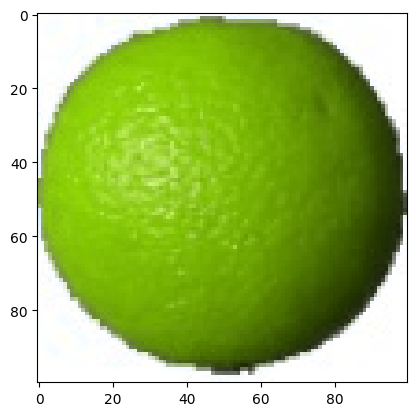

90


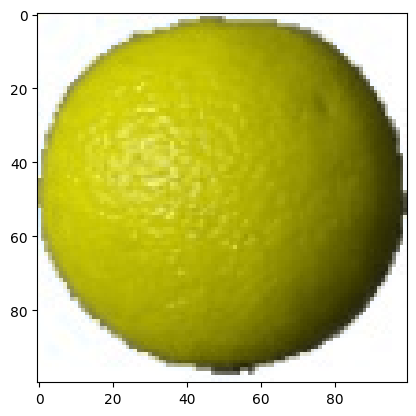

100


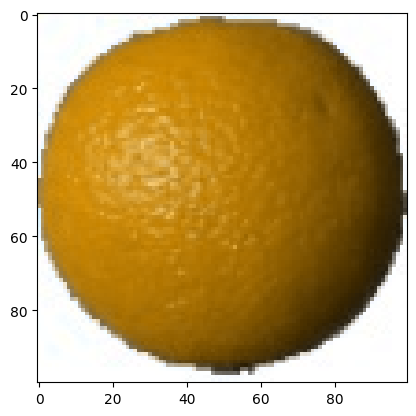

110


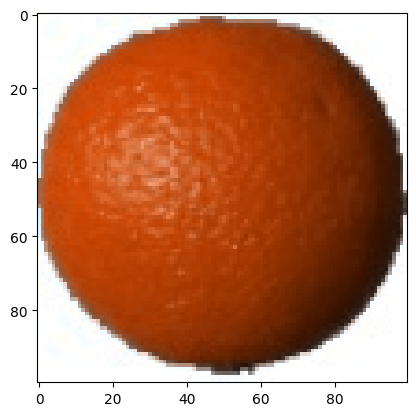

120


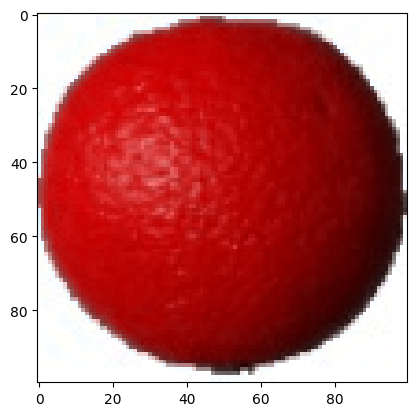

130


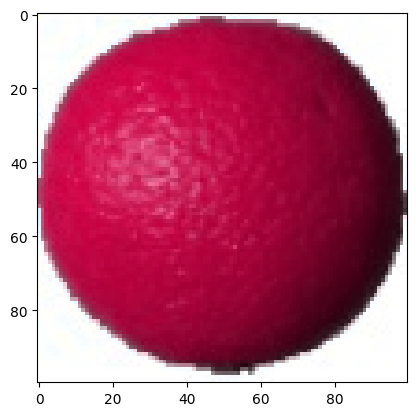

140


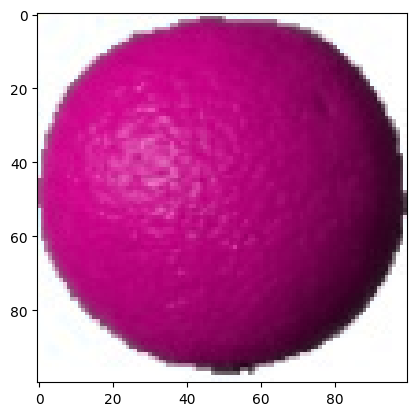

150


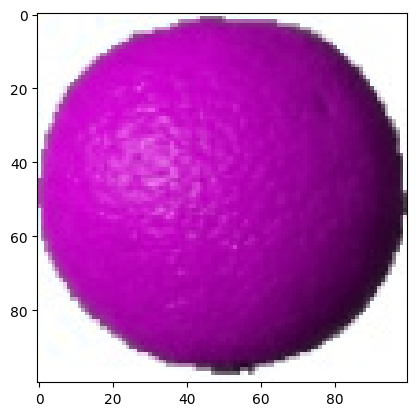

160


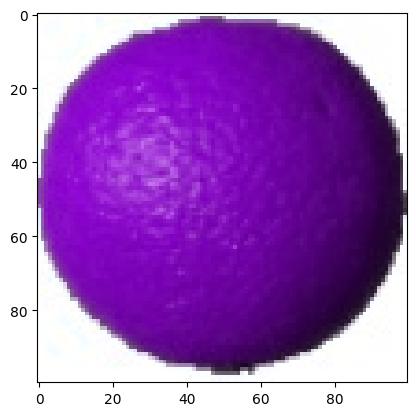

170


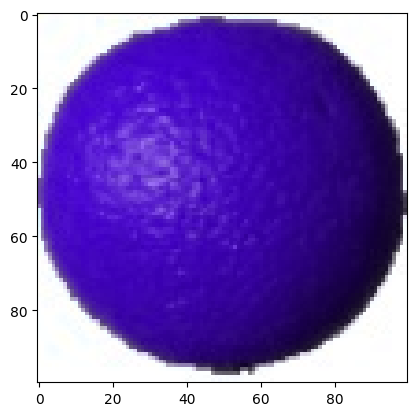

In [5]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue_values = [i for i in range(0, 180, 10)]
for hue_value in hue_values:
    print(hue_value)
    hsv[mask != 0, 0] = hue_value
    result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    plt.imshow(result)
    plt.show()

#### Manderin

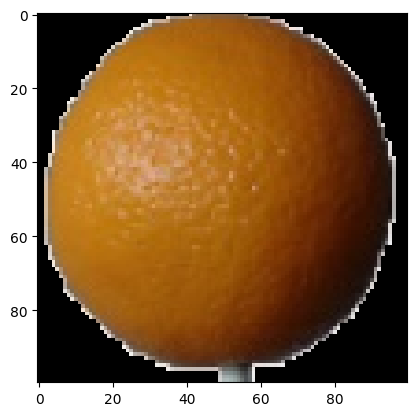

In [6]:
img = cv2.imread('../FruitData/OriginalData/Training_Data/Orange/r_250_100.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)[1]
object_img = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(object_img, cv2.COLOR_BGR2RGB))
plt.show()

0


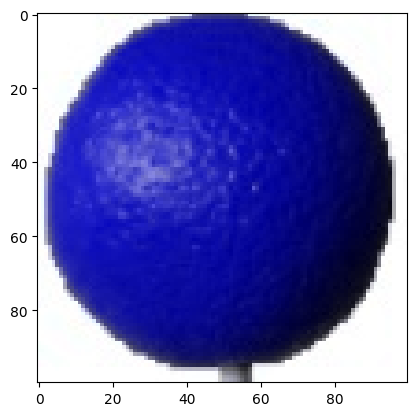

10


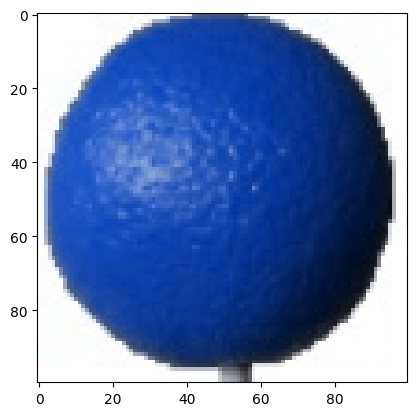

20


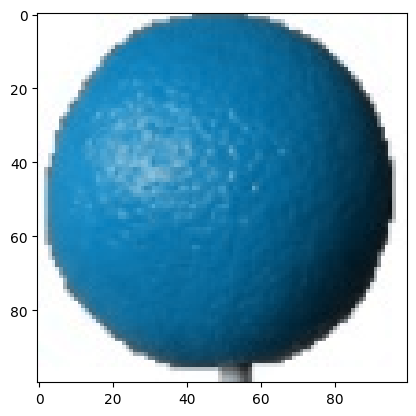

30


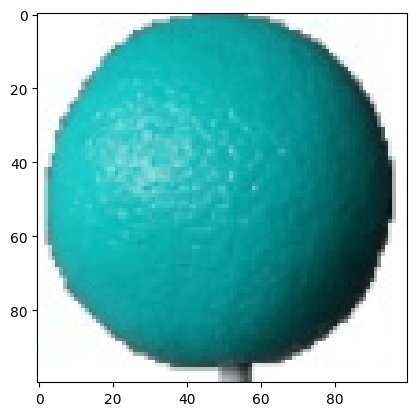

40


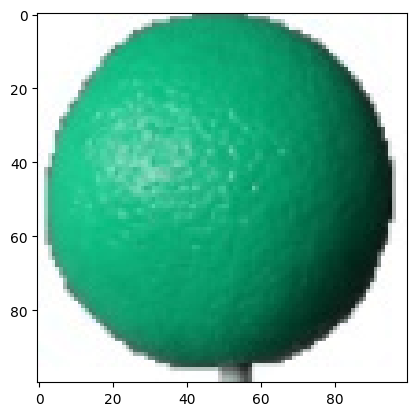

50


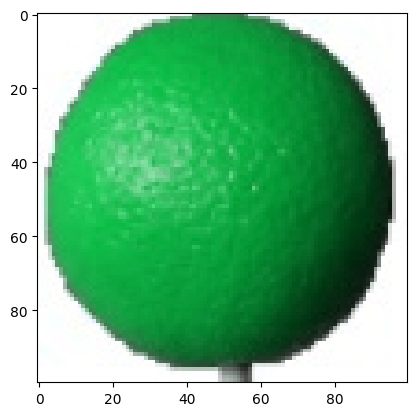

60


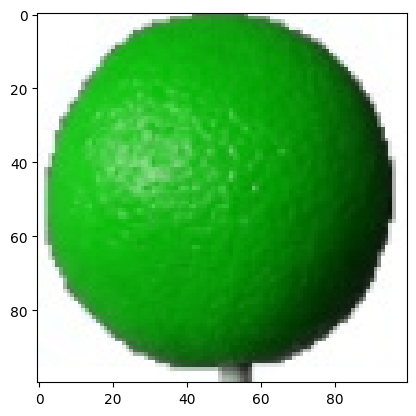

70


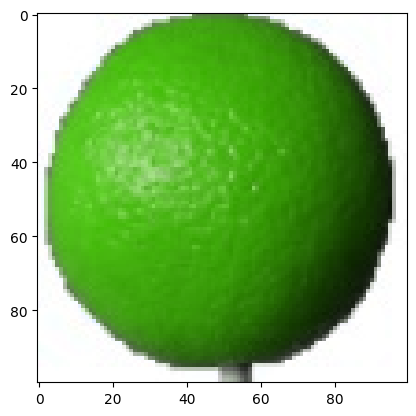

80


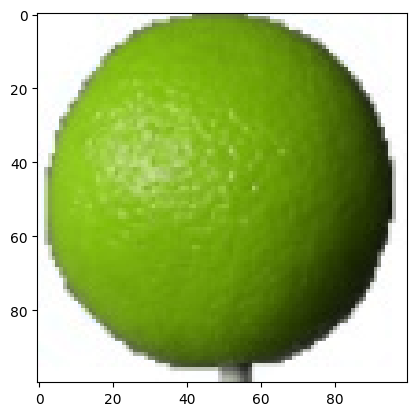

90


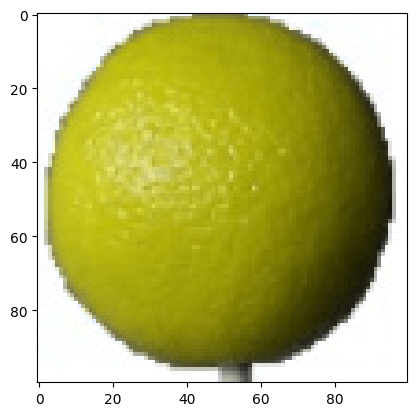

100


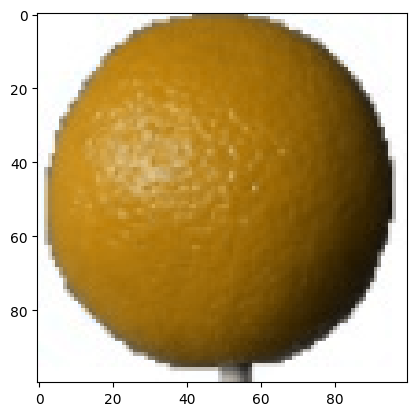

110


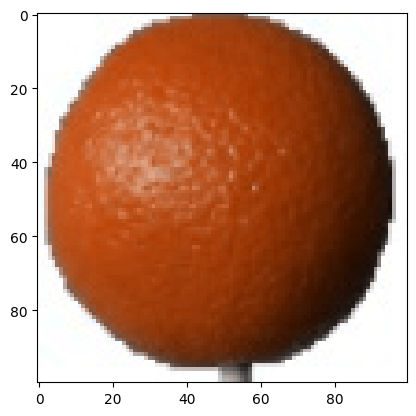

120


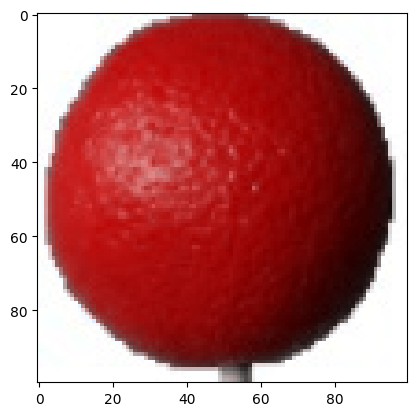

130


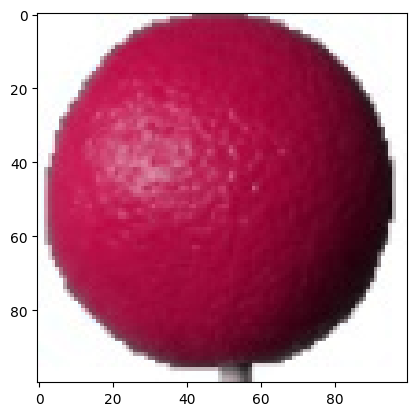

140


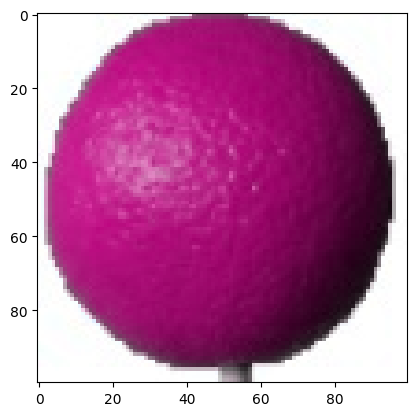

150


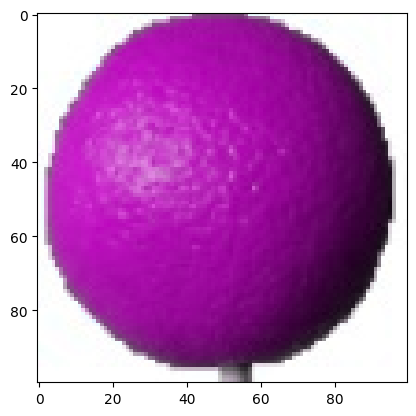

160


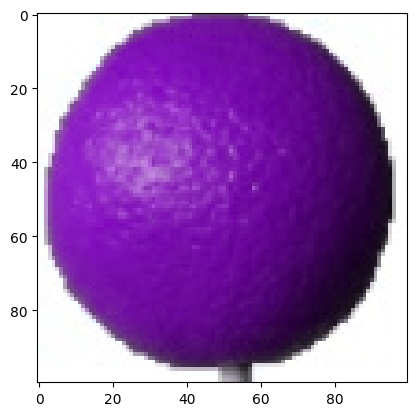

170


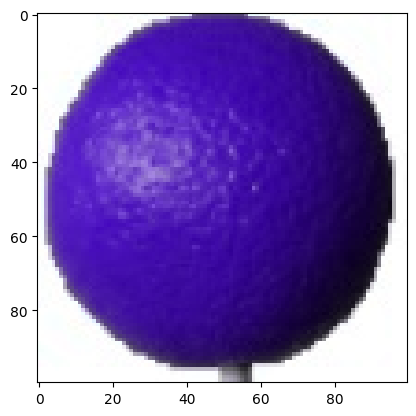

In [7]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue_values = [i for i in range(0, 180, 10)]
for hue_value in hue_values:
    print(hue_value)
    hsv[mask != 0, 0] = hue_value
    result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    plt.imshow(result)
    plt.show()

#### Guava

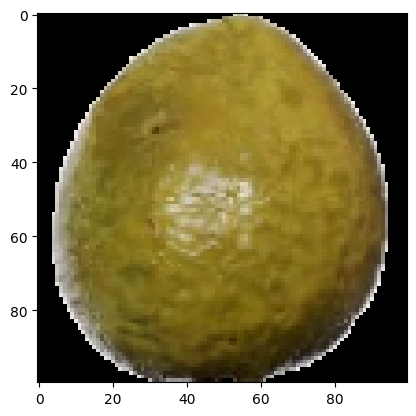

0


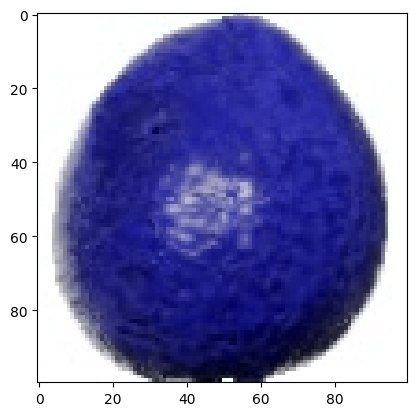

10


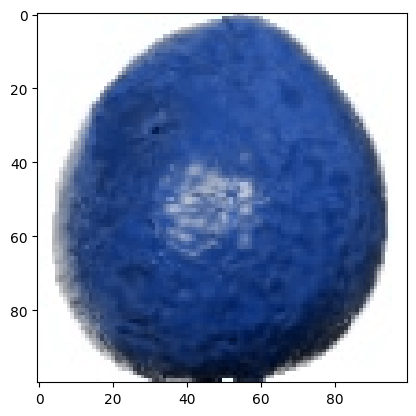

20


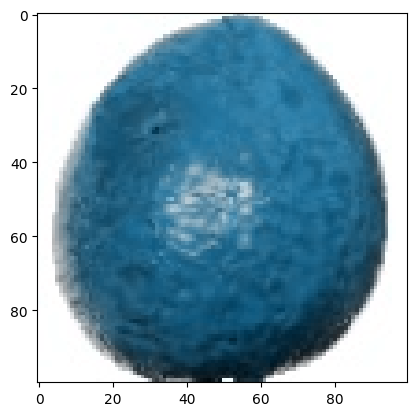

30


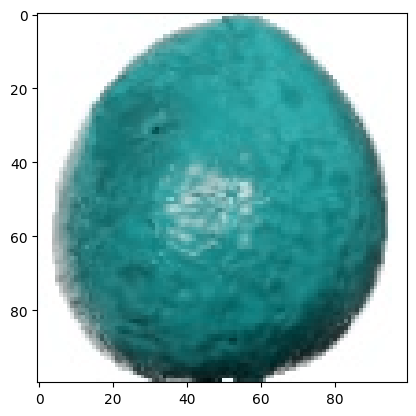

40


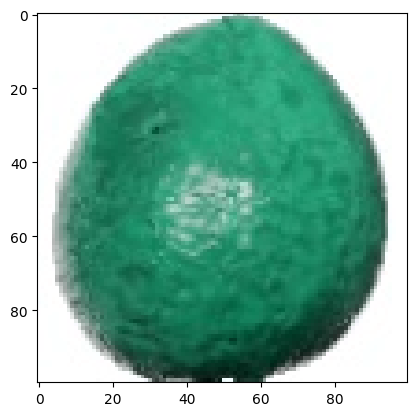

50


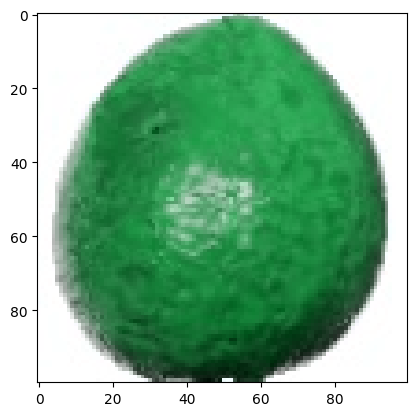

60


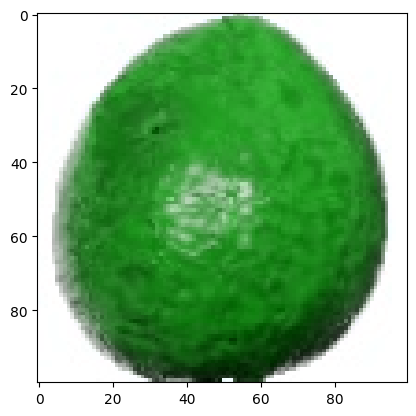

70


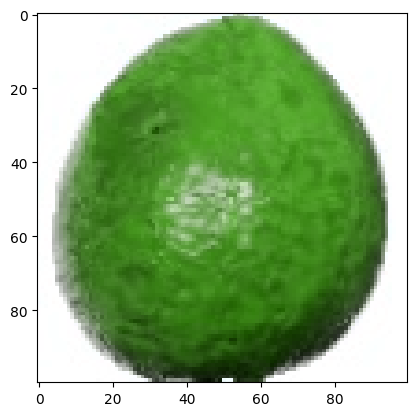

80


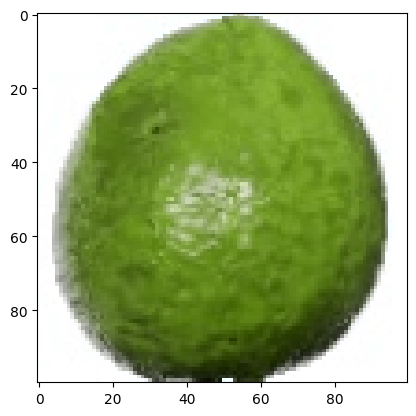

90


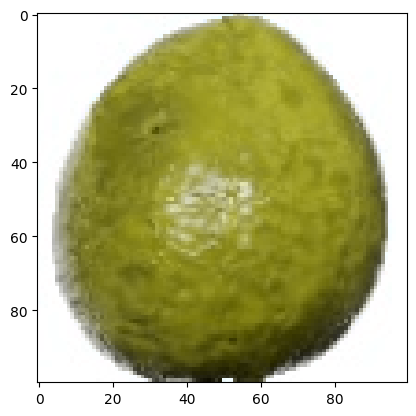

100


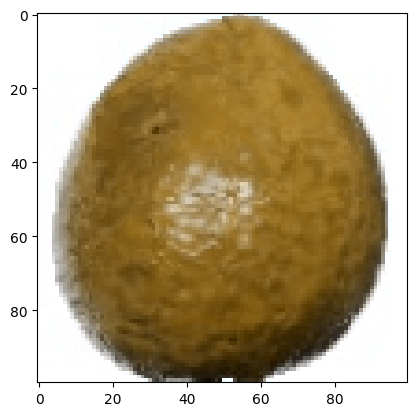

110


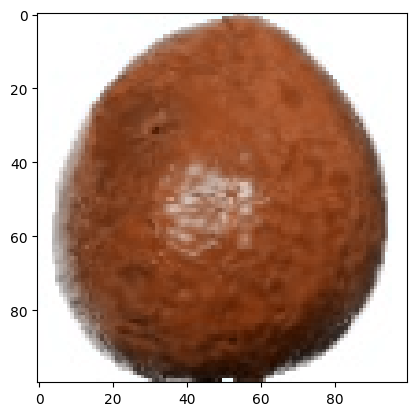

120


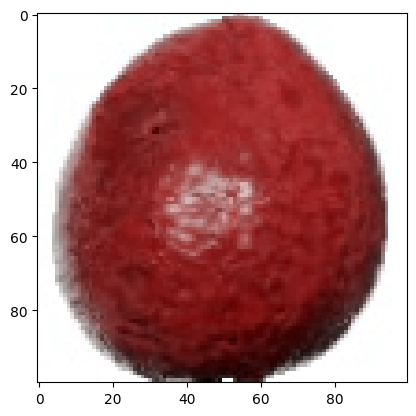

130


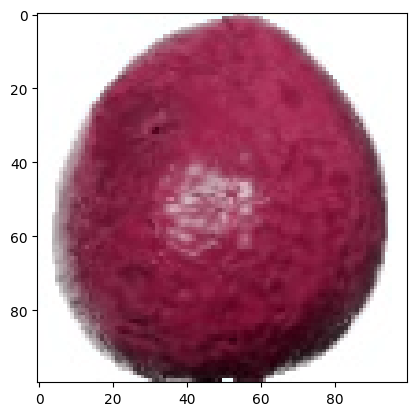

140


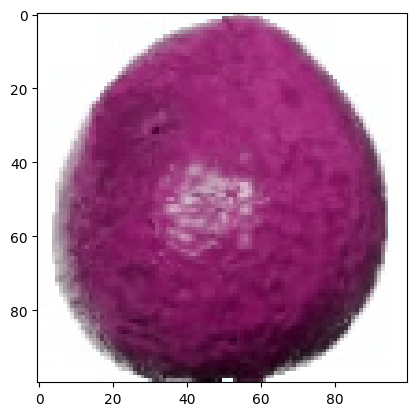

150


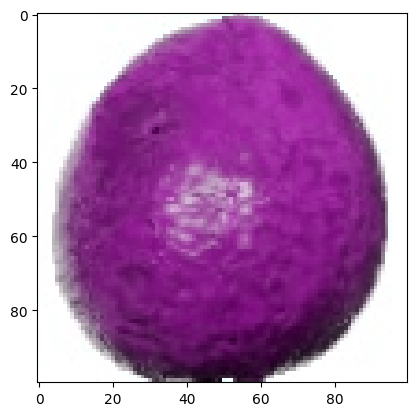

160


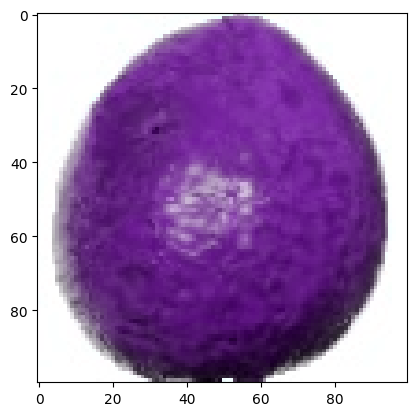

170


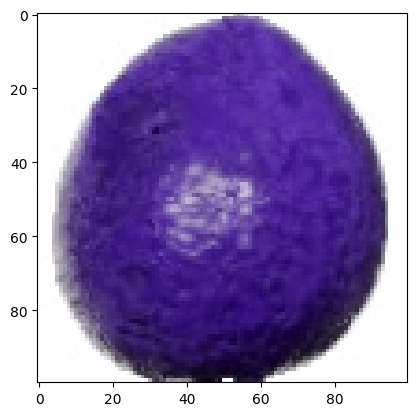

In [8]:
img = cv2.imread('../FruitData/OriginalData/Training_Data/Guava/0_100.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)[1]
object_img = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(object_img, cv2.COLOR_BGR2RGB))
plt.show()

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue_values = [i for i in range(0, 180, 10)]
for hue_value in hue_values:
    print(hue_value)
    hsv[mask != 0, 0] = hue_value
    result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    plt.imshow(result)
    plt.show()

#### Discussion
From the images above. The HUE value for a green object can be from 50 to 80. The HUE for red object can be around 115 to 125. The HUE value for a yellow from 93 to 97.

# Dataset Creation
Now we create a dataset that contains 12 classes. We have 4 object (apple, orange, madarine, guava), with 3 different colors (red, green, yellow).

### Check the size of the current dataset

In [9]:
# Training_Data
original_base_path = '../FruitData/OriginalData/Training_Data'
apple_original_base_path = os.path.join(original_base_path, 'Apple')
guava_original_base_path = os.path.join(original_base_path, 'Guava')
orange_original_base_path = os.path.join(original_base_path, 'Orange')
mandarine_original_base_path = os.path.join(original_base_path, 'Mandarine')


In [10]:
import os

image_extensions = ['.jpg', '.jpeg', '.png']  # Add any other image extensions you want to include

apple_num_images = sum([len(files) for _, _, files in os.walk(apple_original_base_path) if any(file.endswith(tuple(image_extensions)) for file in files)])
print(f"There are {apple_num_images} images in the apple folder.")

guava_num_images = sum([len(files) for _, _, files in os.walk(guava_original_base_path) if any(file.endswith(tuple(image_extensions)) for file in files)])
print(f"There are {guava_num_images} images in the guava folder.")

orange_num_images = sum([len(files) for _, _, files in os.walk(orange_original_base_path) if any(file.endswith(tuple(image_extensions)) for file in files)])
print(f"There are {orange_num_images} images in the orange folder.")

mandarine_num_images = sum([len(files) for _, _, files in os.walk(mandarine_original_base_path) if any(file.endswith(tuple(image_extensions)) for file in files)])
print(f"There are {mandarine_num_images} images in the mandarine folder.")

There are 492 images in the apple folder.
There are 490 images in the guava folder.
There are 479 images in the orange folder.
There are 490 images in the mandarine folder.


In [11]:
#Test_Data
original_base_path = '../FruitData/OriginalData/Test_Data'
apple_test_base_path = os.path.join(original_base_path, 'Apple')
guava_test_base_path = os.path.join(original_base_path, 'Guava')
orange_test_base_path = os.path.join(original_base_path, 'Orange')
mandarine_test_base_path = os.path.join(original_base_path, 'Mandarine')

apple_num_images = sum([len(files) for _, _, files in os.walk(apple_test_base_path) if any(file.endswith(tuple(image_extensions)) for file in files)])
print(f"There are {apple_num_images} images in the apple folder.")

guava_num_images = sum([len(files) for _, _, files in os.walk(guava_test_base_path) if any(file.endswith(tuple(image_extensions)) for file in files)])
print(f"There are {guava_num_images} images in the guava folder.")

orange_num_images = sum([len(files) for _, _, files in os.walk(orange_test_base_path) if any(file.endswith(tuple(image_extensions)) for file in files)])
print(f"There are {orange_num_images} images in the orange folder.")

mandarine_num_images = sum([len(files) for _, _, files in os.walk(mandarine_test_base_path) if any(file.endswith(tuple(image_extensions)) for file in files)])
print(f"There are {mandarine_num_images} images in the mandarine folder.")

There are 164 images in the apple folder.
There are 166 images in the guava folder.
There are 160 images in the orange folder.
There are 166 images in the mandarine folder.


In [12]:
def make_synthetic_data(input_folder_path, output_folder_path, color):
    assert color == 'Red' or color == 'Green' or color == 'Yellow', "Color must be either Red, Green or Yellow"
    if color == 'Red':
        hue_values = [i for i in range(115, 125, 1)]
    elif color == 'Green':
        hue_values = [i for i in range(50, 80, 1)]
    else:
        hue_values = [i for i in range(93, 97, 1)]
        
    image_extensions = ['.jpg', '.jpeg', '.png']
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
        
    
    for file in os.listdir(input_folder_path):
        if os.path.splitext(file)[-1].lower() in image_extensions:
            input_path = os.path.join(input_folder_path, file)
            output_path = os.path.join(output_folder_path, file)
            
             # Apply your function to the input image
            img = cv2.imread(input_path)
            processed_img = get_object(img)
            
            random_index = random.randint(0, len(hue_values)-1)
            hue_value = hue_values[random_index]
            processed_img = transform_color(processed_img, hue_value)
            
            plt.imshow(processed_img)
            plt.plot()

            # Write the processed image to the output folder
            cv2.imwrite(output_path, cv2.cvtColor(processed_img, cv2.COLOR_RGB2BGR))
            print(f"{input_path} processed and saved to {output_path}")
        

def get_object(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)[1]
    object_img = cv2.bitwise_and(img, img, mask=mask)
    return object_img

def transform_color(img, hue_value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv[mask != 0, 0] = hue_value
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

../FruitData/OriginalData/Training_Data\Apple\0_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\0_100.jpg
../FruitData/OriginalData/Training_Data\Apple\100_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\100_100.jpg
../FruitData/OriginalData/Training_Data\Apple\101_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\101_100.jpg
../FruitData/OriginalData/Training_Data\Apple\102_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\102_100.jpg
../FruitData/OriginalData/Training_Data\Apple\103_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\103_100.jpg
../FruitData/OriginalData/Training_Data\Apple\104_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\104_100.jpg
../FruitData/OriginalData/Training_Data\Apple\105_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\105_100.

../FruitData/OriginalData/Training_Data\Apple\155_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\155_100.jpg
../FruitData/OriginalData/Training_Data\Apple\156_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\156_100.jpg
../FruitData/OriginalData/Training_Data\Apple\157_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\157_100.jpg
../FruitData/OriginalData/Training_Data\Apple\158_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\158_100.jpg
../FruitData/OriginalData/Training_Data\Apple\159_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\159_100.jpg
../FruitData/OriginalData/Training_Data\Apple\15_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\15_100.jpg
../FruitData/OriginalData/Training_Data\Apple\160_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\160_10

../FruitData/OriginalData/Training_Data\Apple\207_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\207_100.jpg
../FruitData/OriginalData/Training_Data\Apple\208_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\208_100.jpg
../FruitData/OriginalData/Training_Data\Apple\209_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\209_100.jpg
../FruitData/OriginalData/Training_Data\Apple\20_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\20_100.jpg
../FruitData/OriginalData/Training_Data\Apple\210_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\210_100.jpg
../FruitData/OriginalData/Training_Data\Apple\211_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\211_100.jpg
../FruitData/OriginalData/Training_Data\Apple\212_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\212_10

../FruitData/OriginalData/Training_Data\Apple\279_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\279_100.jpg
../FruitData/OriginalData/Training_Data\Apple\27_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\27_100.jpg
../FruitData/OriginalData/Training_Data\Apple\280_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\280_100.jpg
../FruitData/OriginalData/Training_Data\Apple\281_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\281_100.jpg
../FruitData/OriginalData/Training_Data\Apple\282_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\282_100.jpg
../FruitData/OriginalData/Training_Data\Apple\283_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\283_100.jpg
../FruitData/OriginalData/Training_Data\Apple\284_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\284_10

../FruitData/OriginalData/Training_Data\Apple\r_117_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_117_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_118_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_118_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_119_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_119_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_11_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_11_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_120_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_120_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_121_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_121_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_122_100.jpg processed and saved to ../FruitData/SyntheticData/Trai

../FruitData/OriginalData/Training_Data\Apple\r_172_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_172_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_173_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_173_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_174_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_174_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_175_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_175_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_176_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_176_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_177_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_177_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_178_100.jpg processed and saved to ../FruitData/SyntheticData/Tr

../FruitData/OriginalData/Training_Data\Apple\r_244_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_244_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_245_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_245_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_246_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_246_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_247_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_247_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_248_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_248_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_249_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_249_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_24_100.jpg processed and saved to ../FruitData/SyntheticData/Tra

../FruitData/OriginalData/Training_Data\Apple\r_302_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_302_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_303_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_303_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_304_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_304_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_305_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_305_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_306_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_306_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_307_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Red\r_307_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_308_100.jpg processed and saved to ../FruitData/SyntheticData/Tr

../FruitData/OriginalData/Test_Data\Apple\6_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Red\6_100.jpg
../FruitData/OriginalData/Test_Data\Apple\70_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Red\70_100.jpg
../FruitData/OriginalData/Test_Data\Apple\71_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Red\71_100.jpg
../FruitData/OriginalData/Test_Data\Apple\72_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Red\72_100.jpg
../FruitData/OriginalData/Test_Data\Apple\73_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Red\73_100.jpg
../FruitData/OriginalData/Test_Data\Apple\74_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Red\74_100.jpg
../FruitData/OriginalData/Test_Data\Apple\75_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Red\75_100.jpg
../FruitData/OriginalData/Test_Data\Apple\76_100.jpg processed a

../FruitData/OriginalData/Test_Data\Apple\r_61_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Red\r_61_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_62_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Red\r_62_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_63_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Red\r_63_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_64_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Red\r_64_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_65_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Red\r_65_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_66_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Red\r_66_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_67_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Red\r_67_100.jpg
../FruitData/OriginalData/Test_Dat

../FruitData/OriginalData/Training_Data\Apple\127_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\127_100.jpg
../FruitData/OriginalData/Training_Data\Apple\128_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\128_100.jpg
../FruitData/OriginalData/Training_Data\Apple\129_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\129_100.jpg
../FruitData/OriginalData/Training_Data\Apple\12_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\12_100.jpg
../FruitData/OriginalData/Training_Data\Apple\130_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\130_100.jpg
../FruitData/OriginalData/Training_Data\Apple\131_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\131_100.jpg
../FruitData/OriginalData/Training_Data\Apple\132_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Appl

../FruitData/OriginalData/Training_Data\Apple\19_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\19_100.jpg
../FruitData/OriginalData/Training_Data\Apple\1_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\1_100.jpg
../FruitData/OriginalData/Training_Data\Apple\200_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\200_100.jpg
../FruitData/OriginalData/Training_Data\Apple\201_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\201_100.jpg
../FruitData/OriginalData/Training_Data\Apple\202_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\202_100.jpg
../FruitData/OriginalData/Training_Data\Apple\203_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\203_100.jpg
../FruitData/OriginalData/Training_Data\Apple\204_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Gr

../FruitData/OriginalData/Training_Data\Apple\262_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\262_100.jpg
../FruitData/OriginalData/Training_Data\Apple\263_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\263_100.jpg
../FruitData/OriginalData/Training_Data\Apple\264_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\264_100.jpg
../FruitData/OriginalData/Training_Data\Apple\265_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\265_100.jpg
../FruitData/OriginalData/Training_Data\Apple\266_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\266_100.jpg
../FruitData/OriginalData/Training_Data\Apple\267_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\267_100.jpg
../FruitData/OriginalData/Training_Data\Apple\268_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Ap

../FruitData/OriginalData/Training_Data\Apple\r_120_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_120_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_121_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_121_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_122_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_122_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_123_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_123_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_124_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_124_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_125_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_125_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_126_100.jpg processed and saved to ../FruitData/Synt

../FruitData/OriginalData/Training_Data\Apple\r_185_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_185_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_186_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_186_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_187_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_187_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_188_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_188_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_189_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_189_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_18_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_18_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_190_100.jpg processed and saved to ../FruitData/Synthe

../FruitData/OriginalData/Training_Data\Apple\r_253_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_253_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_254_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_254_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_255_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_255_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_256_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_256_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_257_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_257_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_258_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Green\r_258_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_259_100.jpg processed and saved to ../FruitData/Synt

../FruitData/OriginalData/Test_Data\Apple\327_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\327_100.jpg
../FruitData/OriginalData/Test_Data\Apple\32_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\32_100.jpg
../FruitData/OriginalData/Test_Data\Apple\33_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\33_100.jpg
../FruitData/OriginalData/Test_Data\Apple\34_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\34_100.jpg
../FruitData/OriginalData/Test_Data\Apple\35_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\35_100.jpg
../FruitData/OriginalData/Test_Data\Apple\36_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\36_100.jpg
../FruitData/OriginalData/Test_Data\Apple\37_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\37_100.jpg
../FruitData/OriginalData/Test_Data\Apple\38_1

../FruitData/OriginalData/Test_Data\Apple\9_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\9_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_321_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\r_321_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_322_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\r_322_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_323_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\r_323_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_324_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\r_324_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_325_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\r_325_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_326_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\r_326_100.jpg
../FruitData/O

../FruitData/OriginalData/Test_Data\Apple\r_94_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\r_94_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_95_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\r_95_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_96_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\r_96_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_97_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\r_97_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_98_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\r_98_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_99_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\r_99_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_9_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Green\r_9_100.jpg
../FruitData/OriginalD

../FruitData/OriginalData/Training_Data\Apple\14_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\14_100.jpg
../FruitData/OriginalData/Training_Data\Apple\150_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\150_100.jpg
../FruitData/OriginalData/Training_Data\Apple\151_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\151_100.jpg
../FruitData/OriginalData/Training_Data\Apple\152_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\152_100.jpg
../FruitData/OriginalData/Training_Data\Apple\153_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\153_100.jpg
../FruitData/OriginalData/Training_Data\Apple\154_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\154_100.jpg
../FruitData/OriginalData/Training_Data\Apple\155_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Dat

../FruitData/OriginalData/Training_Data\Apple\202_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\202_100.jpg
../FruitData/OriginalData/Training_Data\Apple\203_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\203_100.jpg
../FruitData/OriginalData/Training_Data\Apple\204_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\204_100.jpg
../FruitData/OriginalData/Training_Data\Apple\205_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\205_100.jpg
../FruitData/OriginalData/Training_Data\Apple\206_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\206_100.jpg
../FruitData/OriginalData/Training_Data\Apple\207_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\207_100.jpg
../FruitData/OriginalData/Training_Data\Apple\208_100.jpg processed and saved to ../FruitData/SyntheticData/Training_D

../FruitData/OriginalData/Training_Data\Apple\287_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\287_100.jpg
../FruitData/OriginalData/Training_Data\Apple\288_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\288_100.jpg
../FruitData/OriginalData/Training_Data\Apple\289_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\289_100.jpg
../FruitData/OriginalData/Training_Data\Apple\28_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\28_100.jpg
../FruitData/OriginalData/Training_Data\Apple\290_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\290_100.jpg
../FruitData/OriginalData/Training_Data\Apple\291_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\291_100.jpg
../FruitData/OriginalData/Training_Data\Apple\292_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Dat

../FruitData/OriginalData/Training_Data\Apple\r_115_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_115_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_116_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_116_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_117_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_117_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_118_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_118_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_119_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_119_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_11_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_11_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_120_100.jpg processed and saved to ../FruitData/

../FruitData/OriginalData/Training_Data\Apple\r_166_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_166_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_167_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_167_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_168_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_168_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_169_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_169_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_16_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_16_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_170_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_170_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_171_100.jpg processed and saved to ../FruitData/

../FruitData/OriginalData/Training_Data\Apple\r_217_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_217_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_218_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_218_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_219_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_219_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_21_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_21_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_220_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_220_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_221_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_221_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_222_100.jpg processed and saved to ../FruitData/

../FruitData/OriginalData/Training_Data\Apple\r_306_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_306_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_307_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_307_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_308_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_308_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_309_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_309_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_30_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_30_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_310_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Apple_Yellow\r_310_100.jpg
../FruitData/OriginalData/Training_Data\Apple\r_311_100.jpg processed and saved to ../FruitData/

../FruitData/OriginalData/Test_Data\Apple\r_35_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Yellow\r_35_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_36_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Yellow\r_36_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_37_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Yellow\r_37_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_38_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Yellow\r_38_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_39_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Yellow\r_39_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_3_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Yellow\r_3_100.jpg
../FruitData/OriginalData/Test_Data\Apple\r_40_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Apple_Yellow\r_40_100.jpg
../FruitData/Or

../FruitData/OriginalData/Training_Data\Guava\138_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\138_100.jpg
../FruitData/OriginalData/Training_Data\Guava\139_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\139_100.jpg
../FruitData/OriginalData/Training_Data\Guava\13_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\13_100.jpg
../FruitData/OriginalData/Training_Data\Guava\140_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\140_100.jpg
../FruitData/OriginalData/Training_Data\Guava\141_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\141_100.jpg
../FruitData/OriginalData/Training_Data\Guava\142_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\142_100.jpg
../FruitData/OriginalData/Training_Data\Guava\143_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\143_10

../FruitData/OriginalData/Training_Data\Guava\217_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\217_100.jpg
../FruitData/OriginalData/Training_Data\Guava\218_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\218_100.jpg
../FruitData/OriginalData/Training_Data\Guava\219_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\219_100.jpg
../FruitData/OriginalData/Training_Data\Guava\21_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\21_100.jpg
../FruitData/OriginalData/Training_Data\Guava\220_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\220_100.jpg
../FruitData/OriginalData/Training_Data\Guava\221_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\221_100.jpg
../FruitData/OriginalData/Training_Data\Guava\222_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\222_10

../FruitData/OriginalData/Training_Data\Guava\301_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\301_100.jpg
../FruitData/OriginalData/Training_Data\Guava\302_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\302_100.jpg
../FruitData/OriginalData/Training_Data\Guava\303_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\303_100.jpg
../FruitData/OriginalData/Training_Data\Guava\304_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\304_100.jpg
../FruitData/OriginalData/Training_Data\Guava\305_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\305_100.jpg
../FruitData/OriginalData/Training_Data\Guava\306_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\306_100.jpg
../FruitData/OriginalData/Training_Data\Guava\307_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\307_

../FruitData/OriginalData/Training_Data\Guava\r_177_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_177_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_178_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_178_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_179_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_179_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_17_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_17_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_180_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_180_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_181_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_181_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_182_100.jpg processed and saved to ../FruitData/SyntheticData/Trai

../FruitData/OriginalData/Training_Data\Guava\r_306_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_306_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_307_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_307_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_308_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_308_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_309_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_309_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_30_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_30_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_310_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_310_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_311_100.jpg processed and saved to ../FruitData/SyntheticData/Trai

../FruitData/OriginalData/Training_Data\Guava\r_91_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_91_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_92_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_92_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_93_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_93_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_94_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_94_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_95_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_95_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_96_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Red\r_96_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_97_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\G

../FruitData/OriginalData/Test_Data\Guava\84_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Red\84_100.jpg
../FruitData/OriginalData/Test_Data\Guava\85_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Red\85_100.jpg
../FruitData/OriginalData/Test_Data\Guava\89_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Red\89_100.jpg
../FruitData/OriginalData/Test_Data\Guava\91_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Red\91_100.jpg
../FruitData/OriginalData/Test_Data\Guava\92_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Red\92_100.jpg
../FruitData/OriginalData/Test_Data\Guava\93_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Red\93_100.jpg
../FruitData/OriginalData/Test_Data\Guava\94_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Red\94_100.jpg
../FruitData/OriginalData/Test_Data\Guava\95_100.jpg processed

../FruitData/OriginalData/Test_Data\Guava\r_297_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Red\r_297_100.jpg
../FruitData/OriginalData/Test_Data\Guava\r_298_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Red\r_298_100.jpg
../FruitData/OriginalData/Test_Data\Guava\r_303_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Red\r_303_100.jpg
../FruitData/OriginalData/Training_Data\Guava\0_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\0_100.jpg
../FruitData/OriginalData/Training_Data\Guava\10_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\10_100.jpg
../FruitData/OriginalData/Training_Data\Guava\113_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\113_100.jpg
../FruitData/OriginalData/Training_Data\Guava\114_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\114_100.jpg
..

../FruitData/OriginalData/Training_Data\Guava\202_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\202_100.jpg
../FruitData/OriginalData/Training_Data\Guava\203_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\203_100.jpg
../FruitData/OriginalData/Training_Data\Guava\204_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\204_100.jpg
../FruitData/OriginalData/Training_Data\Guava\205_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\205_100.jpg
../FruitData/OriginalData/Training_Data\Guava\206_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\206_100.jpg
../FruitData/OriginalData/Training_Data\Guava\207_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\207_100.jpg
../FruitData/OriginalData/Training_Data\Guava\208_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Gu

../FruitData/OriginalData/Training_Data\Guava\295_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\295_100.jpg
../FruitData/OriginalData/Training_Data\Guava\296_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\296_100.jpg
../FruitData/OriginalData/Training_Data\Guava\297_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\297_100.jpg
../FruitData/OriginalData/Training_Data\Guava\298_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\298_100.jpg
../FruitData/OriginalData/Training_Data\Guava\299_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\299_100.jpg
../FruitData/OriginalData/Training_Data\Guava\29_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\29_100.jpg
../FruitData/OriginalData/Training_Data\Guava\2_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_

../FruitData/OriginalData/Training_Data\Guava\r_172_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_172_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_173_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_173_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_174_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_174_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_175_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_175_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_176_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_176_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_177_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_177_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_178_100.jpg processed and saved to ../FruitData/Synt

../FruitData/OriginalData/Training_Data\Guava\r_221_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_221_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_222_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_222_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_223_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_223_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_224_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_224_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_225_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_225_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_226_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_226_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_227_100.jpg processed and saved to ../FruitData/Synt

../FruitData/OriginalData/Training_Data\Guava\r_318_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_318_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_319_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_319_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_31_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_31_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_320_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_320_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_321_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_321_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_322_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Green\r_322_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_323_100.jpg processed and saved to ../FruitData/Synthe

../FruitData/OriginalData/Test_Data\Guava\121_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Green\121_100.jpg
../FruitData/OriginalData/Test_Data\Guava\30_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Green\30_100.jpg
../FruitData/OriginalData/Test_Data\Guava\31_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Green\31_100.jpg
../FruitData/OriginalData/Test_Data\Guava\32_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Green\32_100.jpg
../FruitData/OriginalData/Test_Data\Guava\33_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Green\33_100.jpg
../FruitData/OriginalData/Test_Data\Guava\34_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Green\34_100.jpg
../FruitData/OriginalData/Test_Data\Guava\35_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Green\35_100.jpg
../FruitData/OriginalData/Test_Data\Guava\36_1

../FruitData/OriginalData/Test_Data\Guava\r_169_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Green\r_169_100.jpg
../FruitData/OriginalData/Test_Data\Guava\r_243_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Green\r_243_100.jpg
../FruitData/OriginalData/Test_Data\Guava\r_244_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Green\r_244_100.jpg
../FruitData/OriginalData/Test_Data\Guava\r_245_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Green\r_245_100.jpg
../FruitData/OriginalData/Test_Data\Guava\r_246_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Green\r_246_100.jpg
../FruitData/OriginalData/Test_Data\Guava\r_247_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Green\r_247_100.jpg
../FruitData/OriginalData/Test_Data\Guava\r_248_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Green\r_248_100.jpg
../Fru

../FruitData/OriginalData/Training_Data\Guava\156_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\156_100.jpg
../FruitData/OriginalData/Training_Data\Guava\157_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\157_100.jpg
../FruitData/OriginalData/Training_Data\Guava\158_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\158_100.jpg
../FruitData/OriginalData/Training_Data\Guava\159_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\159_100.jpg
../FruitData/OriginalData/Training_Data\Guava\15_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\15_100.jpg
../FruitData/OriginalData/Training_Data\Guava\160_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\160_100.jpg
../FruitData/OriginalData/Training_Data\Guava\161_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Dat

../FruitData/OriginalData/Training_Data\Guava\241_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\241_100.jpg
../FruitData/OriginalData/Training_Data\Guava\242_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\242_100.jpg
../FruitData/OriginalData/Training_Data\Guava\243_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\243_100.jpg
../FruitData/OriginalData/Training_Data\Guava\244_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\244_100.jpg
../FruitData/OriginalData/Training_Data\Guava\245_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\245_100.jpg
../FruitData/OriginalData/Training_Data\Guava\246_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\246_100.jpg
../FruitData/OriginalData/Training_Data\Guava\247_100.jpg processed and saved to ../FruitData/SyntheticData/Training_D

../FruitData/OriginalData/Training_Data\Guava\294_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\294_100.jpg
../FruitData/OriginalData/Training_Data\Guava\295_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\295_100.jpg
../FruitData/OriginalData/Training_Data\Guava\296_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\296_100.jpg
../FruitData/OriginalData/Training_Data\Guava\297_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\297_100.jpg
../FruitData/OriginalData/Training_Data\Guava\298_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\298_100.jpg
../FruitData/OriginalData/Training_Data\Guava\299_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\299_100.jpg
../FruitData/OriginalData/Training_Data\Guava\29_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Da

../FruitData/OriginalData/Training_Data\Guava\r_131_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_131_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_132_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_132_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_133_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_133_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_134_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_134_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_13_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_13_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_14_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_14_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_15_100.jpg processed and saved to ../FruitData/Syn

../FruitData/OriginalData/Training_Data\Guava\r_293_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_293_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_294_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_294_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_295_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_295_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_296_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_296_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_299_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_299_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_29_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_29_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_2_100.jpg processed and saved to ../FruitData/Sy

../FruitData/OriginalData/Training_Data\Guava\r_8_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_8_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_90_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_90_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_91_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_91_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_92_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_92_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_93_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_93_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_94_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Guava_Yellow\r_94_100.jpg
../FruitData/OriginalData/Training_Data\Guava\r_95_100.jpg processed and saved to ../FruitData/SyntheticData

../FruitData/OriginalData/Test_Data\Guava\r_139_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Yellow\r_139_100.jpg
../FruitData/OriginalData/Test_Data\Guava\r_140_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Yellow\r_140_100.jpg
../FruitData/OriginalData/Test_Data\Guava\r_141_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Yellow\r_141_100.jpg
../FruitData/OriginalData/Test_Data\Guava\r_142_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Yellow\r_142_100.jpg
../FruitData/OriginalData/Test_Data\Guava\r_143_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Yellow\r_143_100.jpg
../FruitData/OriginalData/Test_Data\Guava\r_144_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Yellow\r_144_100.jpg
../FruitData/OriginalData/Test_Data\Guava\r_145_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Guava_Yellow\r_145_100.jpg

../FruitData/OriginalData/Training_Data\Orange\123_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\123_100.jpg
../FruitData/OriginalData/Training_Data\Orange\124_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\124_100.jpg
../FruitData/OriginalData/Training_Data\Orange\125_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\125_100.jpg
../FruitData/OriginalData/Training_Data\Orange\126_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\126_100.jpg
../FruitData/OriginalData/Training_Data\Orange\127_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\127_100.jpg
../FruitData/OriginalData/Training_Data\Orange\128_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\128_100.jpg
../FruitData/OriginalData/Training_Data\Orange\129_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\O

../FruitData/OriginalData/Training_Data\Orange\204_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\204_100.jpg
../FruitData/OriginalData/Training_Data\Orange\205_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\205_100.jpg
../FruitData/OriginalData/Training_Data\Orange\206_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\206_100.jpg
../FruitData/OriginalData/Training_Data\Orange\207_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\207_100.jpg
../FruitData/OriginalData/Training_Data\Orange\208_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\208_100.jpg
../FruitData/OriginalData/Training_Data\Orange\209_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\209_100.jpg
../FruitData/OriginalData/Training_Data\Orange\20_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Or

../FruitData/OriginalData/Training_Data\Orange\280_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\280_100.jpg
../FruitData/OriginalData/Training_Data\Orange\281_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\281_100.jpg
../FruitData/OriginalData/Training_Data\Orange\282_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\282_100.jpg
../FruitData/OriginalData/Training_Data\Orange\283_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\283_100.jpg
../FruitData/OriginalData/Training_Data\Orange\284_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\284_100.jpg
../FruitData/OriginalData/Training_Data\Orange\285_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\285_100.jpg
../FruitData/OriginalData/Training_Data\Orange\286_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\O

../FruitData/OriginalData/Training_Data\Orange\r_151_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_151_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_152_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_152_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_153_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_153_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_154_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_154_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_155_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_155_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_156_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_156_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_157_100.jpg processed and saved to ../FruitData/Syn

../FruitData/OriginalData/Training_Data\Orange\r_231_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_231_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_232_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_232_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_233_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_233_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_234_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_234_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_235_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_235_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_236_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_236_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_237_100.jpg processed and saved to ../FruitData/Syn

../FruitData/OriginalData/Training_Data\Orange\r_310_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_310_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_311_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_311_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_312_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_312_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_313_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_313_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_314_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_314_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_315_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Red\r_315_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_316_100.jpg processed and saved to ../FruitData/Syn

../FruitData/OriginalData/Test_Data\Orange\92_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Red\92_100.jpg
../FruitData/OriginalData/Test_Data\Orange\93_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Red\93_100.jpg
../FruitData/OriginalData/Test_Data\Orange\94_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Red\94_100.jpg
../FruitData/OriginalData/Test_Data\Orange\95_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Red\95_100.jpg
../FruitData/OriginalData/Test_Data\Orange\96_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Red\96_100.jpg
../FruitData/OriginalData/Test_Data\Orange\97_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Red\97_100.jpg
../FruitData/OriginalData/Test_Data\Orange\98_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Red\98_100.jpg
../FruitData/OriginalData/Test_Data\Orange\99_10

../FruitData/OriginalData/Training_Data\Orange\101_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\101_100.jpg
../FruitData/OriginalData/Training_Data\Orange\102_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\102_100.jpg
../FruitData/OriginalData/Training_Data\Orange\103_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\103_100.jpg
../FruitData/OriginalData/Training_Data\Orange\104_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\104_100.jpg
../FruitData/OriginalData/Training_Data\Orange\105_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\105_100.jpg
../FruitData/OriginalData/Training_Data\Orange\106_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\106_100.jpg
../FruitData/OriginalData/Training_Data\Orange\107_100.jpg processed and saved to ../FruitData/SyntheticData/Tra

../FruitData/OriginalData/Training_Data\Orange\192_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\192_100.jpg
../FruitData/OriginalData/Training_Data\Orange\193_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\193_100.jpg
../FruitData/OriginalData/Training_Data\Orange\194_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\194_100.jpg
../FruitData/OriginalData/Training_Data\Orange\195_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\195_100.jpg
../FruitData/OriginalData/Training_Data\Orange\196_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\196_100.jpg
../FruitData/OriginalData/Training_Data\Orange\197_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\197_100.jpg
../FruitData/OriginalData/Training_Data\Orange\198_100.jpg processed and saved to ../FruitData/SyntheticData/Tra

../FruitData/OriginalData/Training_Data\Orange\285_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\285_100.jpg
../FruitData/OriginalData/Training_Data\Orange\286_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\286_100.jpg
../FruitData/OriginalData/Training_Data\Orange\287_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\287_100.jpg
../FruitData/OriginalData/Training_Data\Orange\288_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\288_100.jpg
../FruitData/OriginalData/Training_Data\Orange\289_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\289_100.jpg
../FruitData/OriginalData/Training_Data\Orange\28_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\28_100.jpg
../FruitData/OriginalData/Training_Data\Orange\290_100.jpg processed and saved to ../FruitData/SyntheticData/Train

../FruitData/OriginalData/Training_Data\Orange\r_142_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\r_142_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_143_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\r_143_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_144_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\r_144_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_145_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\r_145_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_146_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\r_146_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_147_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\r_147_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_148_100.jpg processed and saved to ../F

../FruitData/OriginalData/Training_Data\Orange\r_232_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\r_232_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_233_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\r_233_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_234_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\r_234_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_235_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\r_235_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_236_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\r_236_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_237_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Green\r_237_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_238_100.jpg processed and saved to ../F

../FruitData/OriginalData/Test_Data\Orange\30_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Green\30_100.jpg
../FruitData/OriginalData/Test_Data\Orange\310_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Green\310_100.jpg
../FruitData/OriginalData/Test_Data\Orange\31_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Green\31_100.jpg
../FruitData/OriginalData/Test_Data\Orange\32_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Green\32_100.jpg
../FruitData/OriginalData/Test_Data\Orange\33_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Green\33_100.jpg
../FruitData/OriginalData/Test_Data\Orange\34_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Green\34_100.jpg
../FruitData/OriginalData/Test_Data\Orange\35_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Green\35_100.jpg
../FruitData/OriginalData/Test_D

../FruitData/OriginalData/Test_Data\Orange\r_3_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Green\r_3_100.jpg
../FruitData/OriginalData/Test_Data\Orange\r_40_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Green\r_40_100.jpg
../FruitData/OriginalData/Test_Data\Orange\r_41_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Green\r_41_100.jpg
../FruitData/OriginalData/Test_Data\Orange\r_42_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Green\r_42_100.jpg
../FruitData/OriginalData/Test_Data\Orange\r_43_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Green\r_43_100.jpg
../FruitData/OriginalData/Test_Data\Orange\r_44_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Green\r_44_100.jpg
../FruitData/OriginalData/Test_Data\Orange\r_45_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Green\r_45_100.jpg
../Fruit

../FruitData/OriginalData/Training_Data\Orange\12_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\12_100.jpg
../FruitData/OriginalData/Training_Data\Orange\130_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\130_100.jpg
../FruitData/OriginalData/Training_Data\Orange\131_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\131_100.jpg
../FruitData/OriginalData/Training_Data\Orange\132_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\132_100.jpg
../FruitData/OriginalData/Training_Data\Orange\133_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\133_100.jpg
../FruitData/OriginalData/Training_Data\Orange\134_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\134_100.jpg
../FruitData/OriginalData/Training_Data\Orange\135_100.jpg processed and saved to ../FruitData/SyntheticData

../FruitData/OriginalData/Training_Data\Orange\219_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\219_100.jpg
../FruitData/OriginalData/Training_Data\Orange\21_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\21_100.jpg
../FruitData/OriginalData/Training_Data\Orange\220_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\220_100.jpg
../FruitData/OriginalData/Training_Data\Orange\221_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\221_100.jpg
../FruitData/OriginalData/Training_Data\Orange\222_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\222_100.jpg
../FruitData/OriginalData/Training_Data\Orange\223_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\223_100.jpg
../FruitData/OriginalData/Training_Data\Orange\224_100.jpg processed and saved to ../FruitData/SyntheticData

../FruitData/OriginalData/Training_Data\Orange\307_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\307_100.jpg
../FruitData/OriginalData/Training_Data\Orange\308_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\308_100.jpg
../FruitData/OriginalData/Training_Data\Orange\309_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\309_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_0_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_0_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_100_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_100_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_101_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_101_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_102_100.jpg processed and saved to ../FruitData/S

../FruitData/OriginalData/Training_Data\Orange\r_189_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_189_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_18_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_18_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_190_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_190_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_191_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_191_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_192_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_192_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_193_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_193_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_194_100.jpg processed and saved to 

../FruitData/OriginalData/Training_Data\Orange\r_274_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_274_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_275_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_275_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_276_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_276_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_277_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_277_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_278_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_278_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_279_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Orange_Yellow\r_279_100.jpg
../FruitData/OriginalData/Training_Data\Orange\r_27_100.jpg processed and saved to

../FruitData/OriginalData/Test_Data\Orange\71_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Yellow\71_100.jpg
../FruitData/OriginalData/Test_Data\Orange\72_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Yellow\72_100.jpg
../FruitData/OriginalData/Test_Data\Orange\73_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Yellow\73_100.jpg
../FruitData/OriginalData/Test_Data\Orange\74_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Yellow\74_100.jpg
../FruitData/OriginalData/Test_Data\Orange\75_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Yellow\75_100.jpg
../FruitData/OriginalData/Test_Data\Orange\76_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Yellow\76_100.jpg
../FruitData/OriginalData/Test_Data\Orange\77_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Yellow\77_100.jpg
../FruitData/OriginalData/T

../FruitData/OriginalData/Test_Data\Orange\r_86_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Yellow\r_86_100.jpg
../FruitData/OriginalData/Test_Data\Orange\r_87_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Yellow\r_87_100.jpg
../FruitData/OriginalData/Test_Data\Orange\r_88_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Yellow\r_88_100.jpg
../FruitData/OriginalData/Test_Data\Orange\r_89_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Yellow\r_89_100.jpg
../FruitData/OriginalData/Test_Data\Orange\r_8_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Yellow\r_8_100.jpg
../FruitData/OriginalData/Test_Data\Orange\r_90_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Yellow\r_90_100.jpg
../FruitData/OriginalData/Test_Data\Orange\r_91_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Orange_Yellow\r_91_100.jpg
.

../FruitData/OriginalData/Training_Data\Mandarine\176_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\176_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\177_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\177_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\178_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\178_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\179_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\179_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\17_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\17_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\180_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\180_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\181_100.jpg processed and saved to ../Fr

../FruitData/OriginalData/Training_Data\Mandarine\325_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\325_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\326_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\326_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\327_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\327_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\32_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\32_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\33_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\33_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\34_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\34_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\35_100.jpg processed and saved to ../FruitDa

../FruitData/OriginalData/Training_Data\Mandarine\r_128_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_128_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_129_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_129_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_12_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_12_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_130_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_130_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_131_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_131_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_132_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_132_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_133_100.jpg pr

../FruitData/OriginalData/Training_Data\Mandarine\r_209_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_209_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_20_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_20_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_210_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_210_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_211_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_211_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_212_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_212_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_213_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_213_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_214_100.jpg pr

../FruitData/OriginalData/Training_Data\Mandarine\r_294_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_294_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_295_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_295_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_296_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_296_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_297_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_297_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_298_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_298_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_29_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Red\r_29_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_2_100.jpg proc

../FruitData/OriginalData/Test_Data\Mandarine\212_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Red\212_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\213_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Red\213_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\214_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Red\214_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\215_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Red\215_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\216_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Red\216_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\217_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Red\217_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\218_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Red\218_

../FruitData/OriginalData/Test_Data\Mandarine\r_113_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Red\r_113_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_114_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Red\r_114_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_115_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Red\r_115_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_116_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Red\r_116_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_117_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Red\r_117_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_119_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Red\r_119_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_245_100.jpg processed and saved to ../FruitData/SyntheticData/Te

../FruitData/OriginalData/Training_Data\Mandarine\115_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\115_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\116_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\116_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\117_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\117_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\118_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\118_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\119_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\119_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\11_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\11_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\120_100.jpg processed and sa

../FruitData/OriginalData/Training_Data\Mandarine\282_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\282_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\283_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\283_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\284_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\284_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\285_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\285_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\286_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\286_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\287_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\287_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\288_100.jpg processed and 

../FruitData/OriginalData/Training_Data\Mandarine\6_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\6_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\70_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\70_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\71_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\71_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\72_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\72_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\73_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\73_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\74_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\74_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\75_100.jpg processed and saved to ../Fru

../FruitData/OriginalData/Training_Data\Mandarine\r_17_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\r_17_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_180_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\r_180_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_181_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\r_181_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_182_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\r_182_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_183_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\r_183_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_184_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\r_184_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_18

../FruitData/OriginalData/Training_Data\Mandarine\r_274_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\r_274_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_275_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\r_275_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_276_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\r_276_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_277_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\r_277_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_278_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\r_278_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_279_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Green\r_279_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_

../FruitData/OriginalData/Test_Data\Mandarine\195_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Green\195_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\196_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Green\196_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\197_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Green\197_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\198_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Green\198_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\199_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Green\199_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\200_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Green\200_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\201_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandar

../FruitData/OriginalData/Test_Data\Mandarine\r_250_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Green\r_250_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_251_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Green\r_251_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_252_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Green\r_252_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_253_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Green\r_253_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_254_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Green\r_254_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_255_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Green\r_255_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_256_100.jpg processed and saved to ../FruitData/Synt

../FruitData/OriginalData/Training_Data\Mandarine\115_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\115_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\116_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\116_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\117_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\117_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\118_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\118_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\119_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\119_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\11_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\11_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\120_100.jpg processed 

../FruitData/OriginalData/Training_Data\Mandarine\183_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\183_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\184_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\184_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\185_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\185_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\186_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\186_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\187_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\187_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\189_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\189_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\18_100.jpg processed

../FruitData/OriginalData/Training_Data\Mandarine\327_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\327_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\32_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\32_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\33_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\33_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\34_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\34_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\35_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\35_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\36_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\36_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\37_100.jpg processed and saved

../FruitData/OriginalData/Training_Data\Mandarine\97_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\97_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\98_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\98_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\99_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\99_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\9_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\9_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_0_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_0_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_10_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_10_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_118_100.jpg processed and 

../FruitData/OriginalData/Training_Data\Mandarine\r_165_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_165_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_166_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_166_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_167_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_167_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_168_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_168_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_169_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_169_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_16_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_16_100.jpg
../FruitData/OriginalData/Training_Data\Mandarin

../FruitData/OriginalData/Training_Data\Mandarine\r_229_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_229_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_22_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_22_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_230_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_230_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_231_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_231_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_232_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_232_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_233_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_233_100.jpg
../FruitData/OriginalData/Training_Data\Mandarin

../FruitData/OriginalData/Training_Data\Mandarine\r_319_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_319_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_31_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_31_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_320_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_320_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_321_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_321_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_322_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_322_100.jpg
../FruitData/OriginalData/Training_Data\Mandarine\r_323_100.jpg processed and saved to ../FruitData/SyntheticData/Training_Data\Mandarine_Yellow\r_323_100.jpg
../FruitData/OriginalData/Training_Data\Mandarin

../FruitData/OriginalData/Test_Data\Mandarine\220_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Yellow\220_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\221_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Yellow\221_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\222_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Yellow\222_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\223_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Yellow\223_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\224_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Yellow\224_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\225_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Yellow\225_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\226_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\

../FruitData/OriginalData/Test_Data\Mandarine\r_250_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Yellow\r_250_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_251_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Yellow\r_251_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_252_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Yellow\r_252_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_253_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Yellow\r_253_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_254_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Yellow\r_254_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_255_100.jpg processed and saved to ../FruitData/SyntheticData/Test_Data\Mandarine_Yellow\r_255_100.jpg
../FruitData/OriginalData/Test_Data\Mandarine\r_256_100.jpg processed and saved to ../FruitDat

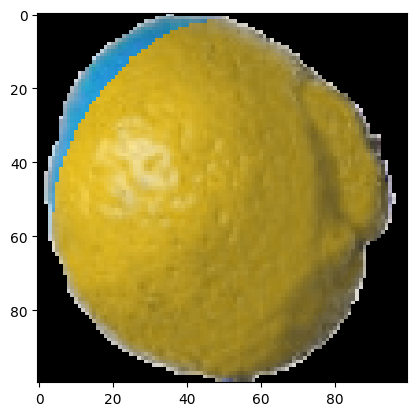

In [13]:
objects = ['Apple', 'Guava', 'Orange', 'Mandarine']
colors = ['Red', 'Green', 'Yellow']


original_training_base_path = '../FruitData/OriginalData/Training_Data'
original_test_base_path = '../FruitData/OriginalData/Test_Data'
synthetic_training_base_path = '../FruitData/SyntheticData/Training_Data'
synthetic_test_base_path = '../FruitData/SyntheticData/Test_Data'
for obj in objects:
    for color in colors:
        object_original_training_path = os.path.join(original_training_base_path, obj)
        object_original_test_path = os.path.join(original_test_base_path, obj)
        
        object_synthetic_training_path = os.path.join(synthetic_training_base_path, f'{obj}_{color}')
        object_synthetic_test_path = os.path.join(synthetic_test_base_path, f'{obj}_{color}')
        
        make_synthetic_data(object_original_training_path, object_synthetic_training_path, color)
        make_synthetic_data(object_original_test_path, object_synthetic_test_path, color)        